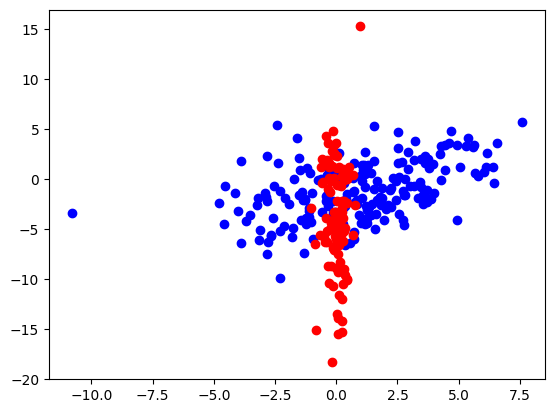

Dataset shape: (290, 2) (290,)
Train/test shapes: (203, 2) (87, 2)
Accuracy: 0.8391 [ours]
Additional metric: 0.7812 [custom]
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87        57
         1.0       0.74      0.83      0.78        30

    accuracy                           0.84        87
   macro avg       0.82      0.84      0.83        87
weighted avg       0.85      0.84      0.84        87



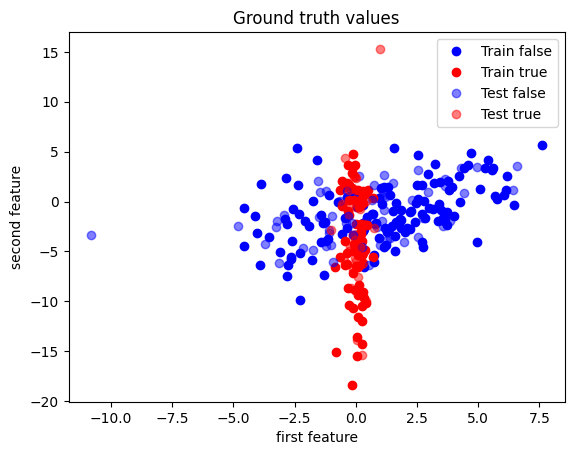

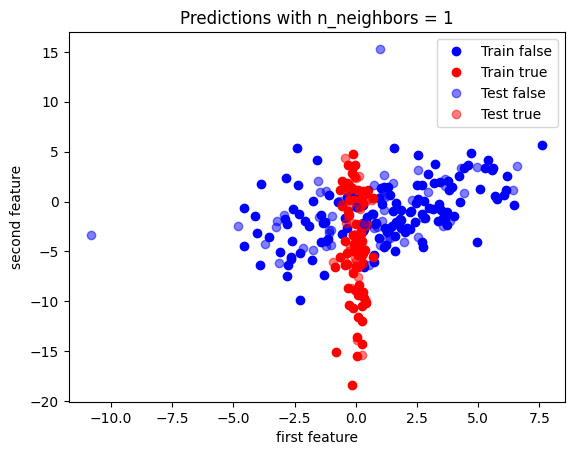

Best score: 0.8390804597701149
Best n: 1


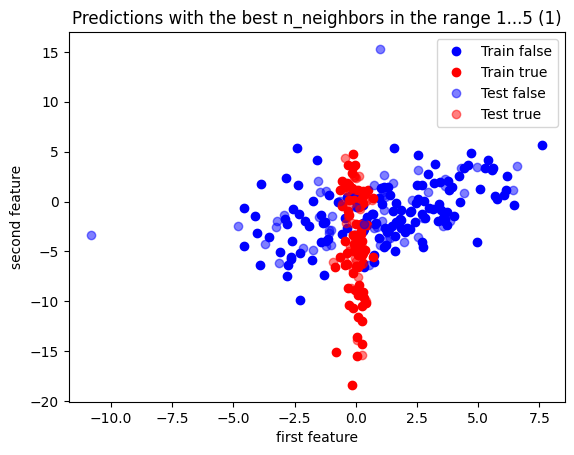

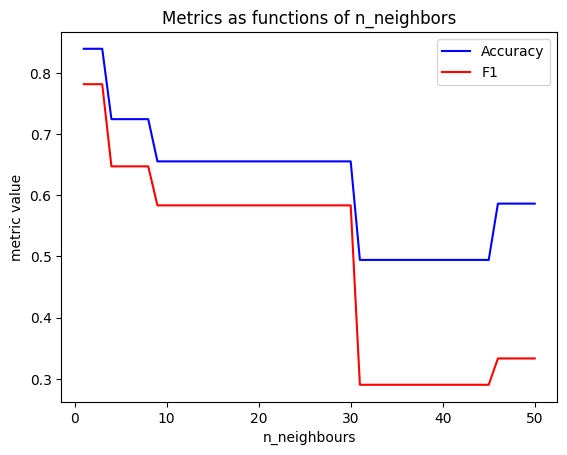

In [1]:
# coding: utf-8
# coding: utf-8
"""
TL;DR Nearest Neighbors, Synthetic Dataset, Euclidean Distance.

Task: 
    1. Implement a k-nearest neighbors (KNN) classifier for two classes with a configurable number of neighbors. 
    2. Implement the accuracy metric and one other metric of your choice.
    3. Visualize the results.

Grading Criteria:
    The maximum score is 10 points. Your grade will equal the total points earned.
    
    * For KNN implementation: up to 4 points.
        - 3 points are awarded if your code works (passes the corresponding assert).
        - A fourth point is awarded if you use internal numpy functions for implementation.
        - Bonus: An additional point is available (not included in the main 10) for a unique approach in the fit method. See comments in the fit method for details.

    * For accuracy and an additional metric: 1 point each, awarded for passing the asserts.

    * For Matplotlib plots: 1 point for each well-crafted plot. This includes clear points (not overly crowded), readable labels, a plot title, legend, and labeled axes. Partial credit (0.5 points) is given if the plot contains the required data but lacks readability.

    * Significant non-compliance with PEP8: -1 point.

Important: make sure, that your code does not raise any error; otherwise I won't check your asset.

Recommendation:
    Start by examining the code from the `if __name__ == "__main__"` section, then proceed to the accuracy function and the KNN class.
"""

import numpy as np
from typing import SupportsIndex
from sklearn.metrics import classification_report, accuracy_score, f1_score
import pandas as pd
from sklearn.model_selection import GridSearchCV


class KNN:
    """
    Class implementing the k-nearest neighbors algorithm.
    """

    def __init__(self, n_neighbors: int = 4):
        # Training data: features
        self.X_train = None

        # Training data: class labels
        self.y_train = None

        # Number of nearest neighbors
        self.n_neighbors = n_neighbors

    def fit(self, X: np.ndarray, y: SupportsIndex):
        """
        Fits the KNN model to the training data. 
        In KNN, "fitting" simply involves storing the training dataset.        
        """
        # For the first try, just store the training set in the object's attributes.
        ...
        #  This is fine as is, but real-world implementations use more efficient data structures.
        #  If you implement something innovative, you may earn a bonus point. Note, that the 
        #  external libraries are prohibited.

        self.X_train = X
        self.y_train = y
        pass

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
            Predicts labels for a set of input samples.
        """
        # TODO: 1) Compute the Euclidean distance between each sample in X and each sample in self.X_train. 
        ...
        # TODO: 2) For each sample in X, find the self.n_neighbors closest samples in self.X_train and aggregate their labels.
        ...
        # Exercise: Consider the asymptotic complexity of this function. How does it depend on the feature space dimension?

        # Fully vectorized solution: 4 points. Other working solutions: 3 points.

        vals, counts = np.unique(
            self.y_train[(
                             np.sum((X - X_train[:, None])**2, axis=2)).argsort(axis=0)[:self.n_neighbors]],
            axis=0, return_counts=True)
        return vals[np.argmax(counts)]
        

def accuracy(labels_true: np.ndarray, labels_pred: np.ndarray) -> float:
    """
    Computes the fraction of correctly predicted labels. 
    This is a simple yet imperfect measure of classification performance.
    """

    return np.mean(labels_true == labels_pred)


def metric(labels_true: np.ndarray, labels_pred: np.ndarray) -> float:
    """
    Implements an additional classification metric. 
    You can choose one we’ve discussed in class or come up with your own.
    """
    insec = pd.concat([pd.Series(labels_true), pd.Series(labels_pred)], axis=1)
    TP = insec[(insec[0] == 1) & (insec[1] == 1)].count()[0]
    TN = insec[(insec[0] == 0) & (insec[1] == 0)].count()[0]
    FP = insec[(insec[0] == 0) & (insec[1] == 1)].count()[0]
    FN = insec[(insec[0] == 1) & (insec[1] == 0)].count()[0]
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = (2*precision*recall)/(precision + recall)
    return f1

if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # Fix random seed for reproducibility
    np.random.seed(100)

    # Create synthetic dataset for training and testing
    means0, covs0 = [1, -1], [[7, 3], [3, 7]]
    x0, y0 = np.random.multivariate_normal(means0, covs0, 190).T

    means1, covs1 = [0, -4], [[0.1, 0.0], [0.0, 25]]
    x1, y1 = np.random.multivariate_normal(means1, covs1, 100).T

    # Visualize the data (optional)
    plt.plot(x0, y0, 'o', color='b')
    plt.plot(x1, y1, 'o', color='r')
    plt.show()

    # Convert data to the appropriate format
    data0, labels0 = np.vstack([x0, y0]).T, np.zeros(len(x0))
    data1, labels1 = np.vstack([x1, y1]).T, np.ones(len(x1))

    data = np.vstack([data0, data1])
    labels = np.hstack([labels0, labels1])
    total_size = data.shape[0]
    print("Dataset shape:", data.shape, labels.shape)

    # Split dataset into 70% train and 30% test
    train_size = int(total_size * 0.7)
    indices = np.random.permutation(total_size)
    X_train, y_train = data[indices][:train_size], labels[indices][:train_size]
    X_test, y_test = data[indices][train_size:], labels[indices][train_size:]
    print("Train/test shapes:", X_train.shape, X_test.shape)
    # TODO: Loop through different values of n_neighbors (1 to 5)

    # Create KNN classifier instance
    predictor = KNN(n_neighbors=3)
    predictor.fit(X_train, y_train)
    y_pred = predictor.predict(X_test)
    # check that your accuracy is honest :^)
    print("Accuracy: %.4f [ours]" % accuracy(y_test, y_pred))
    assert abs(accuracy_score(y_test, y_pred) - accuracy(y_test, y_pred)) < 1e-5

    # Check classifier performance
    assert accuracy_score(y_test, y_pred) > 190 / 290
    # Calculate additional metric and compare with library version
    print("Additional metric: %.4f [custom]" % metric(y_test, y_pred))
    assert abs(metric(y_test, y_pred) - f1_score(y_test, y_pred)) < 1e-5, \
        "Custom metric does not match sklearn metric!"

    # Convenient sklearn tool to calculate standard metrics
    print(classification_report(y_test, y_pred))

    # Matplotlib Exercise:
    # Generate three plots for the test set:
    # - Ground truth labels
    # - Predictions with n_neighbors = 1
    # - Predictions with the best n_neighbors in the range 1...5
    
    # Each plot should include the training data points with appropriate colors,
    # (hint: using transparency or small markers to avoid covering test points).
    
    # Save plots !!to current folder!! using matplotlib's `savefig`.

    # Fourth plot: Plot metrics as functions of n_neighbors.
    # - Show both metrics on one graph with distinct colors and a legend.
    # - If the scales differ, use two vertical axes.

    df_train = pd.DataFrame(data[indices][:train_size])
    df_train['y'] = pd.Series(labels[indices][:train_size])

    df_test = pd.DataFrame(data[indices][train_size:])
    df_test['y'] = pd.Series(labels[indices][train_size:])

    fig = plt.figure()
    plt.plot(df_train[df_train['y'] == 0][0], df_train[df_train['y'] == 0][1], 'o', color='b', label='Train false')
    plt.plot(df_train[df_train['y'] == 1][0], df_train[df_train['y'] == 1][1], 'o', color='r', label='Train true')
    plt.plot(df_test[df_test['y'] == 0][0], df_test[df_test['y'] == 0][1], 'o', color='b', alpha=0.5, label='Test false')
    plt.plot(df_test[df_test['y'] == 1][0], df_test[df_test['y'] == 1][1], 'o', color='r', alpha=0.5, label='Test true')
    plt.title("Ground truth values")
    plt.xlabel("first feature")
    plt.ylabel("second feature")
    plt.legend()
    plt.show()
    fig.savefig("Ground truth values.png", dpi=fig.dpi)

    predictor_1n = KNN(n_neighbors=1)
    predictor_1n.fit(X_train, y_train)
    df_train['pred'] = predictor_1n.predict(X_train)
    df_test['pred'] = predictor_1n.predict(X_test)

    fig = plt.figure()
    plt.plot(df_train[df_train['pred'] == 0][0], df_train[df_train['pred'] == 0][1], 'o', color='b', label='Train false')
    plt.plot(df_train[df_train['pred'] == 1][0], df_train[df_train['pred'] == 1][1], 'o', color='r', label='Train true')
    plt.plot(df_test[df_test['pred'] == 0][0], df_test[df_test['pred'] == 0][1], 'o', color='b', alpha=0.5, label='Test false')
    plt.plot(df_test[df_test['pred'] == 1][0], df_test[df_test['pred'] == 1][1], 'o', color='r', alpha=0.5, label='Test true')
    plt.title("Predictions with n_neighbors = 1")
    plt.xlabel("first feature")
    plt.ylabel("second feature")
    plt.legend()
    plt.show()
    fig.savefig("Predictions with n_neighbors = 1.png", dpi=fig.dpi)

    scores = []
    for i in range(1, 6):
        model = KNN(n_neighbors=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(accuracy(y_test, y_pred))
    scores=np.array(scores)
    print('Best score:', max(scores))
    print('Best n:', np.argmax(scores) + 1)

    best_model = KNN(n_neighbors=1)
    best_model.fit(X_train, y_train)
    df_train['pred_best'] = best_model.predict(X_train)
    df_test['pred_best'] = best_model.predict(X_test)

    fig = plt.figure()
    plt.plot(df_train[df_train['pred_best'] == 0][0], df_train[df_train['pred_best'] == 0][1], 'o', color='b', label='Train false')
    plt.plot(df_train[df_train['pred_best'] == 1][0], df_train[df_train['pred_best'] == 1][1], 'o', color='r', label='Train true')
    plt.plot(df_test[df_test['pred_best'] == 0][0], df_test[df_test['pred_best'] == 0][1], 'o', color='b', alpha=0.5, label='Test false')
    plt.plot(df_test[df_test['pred_best'] == 1][0], df_test[df_test['pred_best'] == 1][1], 'o', color='r', alpha=0.5, label='Test true')
    plt.title("Predictions with the best n_neighbors in the range 1...5 (1)")
    plt.xlabel("first feature")
    plt.ylabel("second feature")
    plt.legend()
    plt.show()
    fig.savefig("Predictions with the best n_neighbors in the range 1...5 (1).png", dpi=fig.dpi)

    scores_acc = []
    scores_f1 = []
    for i in range(1, 51):
        model = KNN(n_neighbors=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores_acc.append(accuracy(y_test, y_pred))
        scores_f1.append(metric(y_test, y_pred))
    scores_acc = pd.Series(scores_acc)
    scores_f1 = pd.Series(scores_f1)

    scores_df = pd.concat([scores_acc, scores_f1], axis=1)

    fig = plt.figure()
    plt.plot(np.arange(1, 51), scores_df[0], '-', color='b', label='Accuracy')
    plt.plot(np.arange(1, 51), scores_df[1], '-', color='r', label='F1')
    plt.title("Metrics as functions of n_neighbors")
    plt.xlabel("n_neighbours")
    plt.ylabel("metric value")
    plt.legend()
    plt.show()
    fig.savefig("Metrics as functions of n_neighbors.png", dpi=fig.dpi)
